# Lab 3 - Global Navigational Satellite Systems (GNSS)

In this lab we will explore various applications of GPS/GNSS, one of the most important geodetic instruments to ever be developed. We will look at single point positioning, accessing and interpreting GNSS position time-series, and analyzing velocities to compute strain rate and fault locking. 

## Part A - Surveying and Single-point positioning
Since we cannot meet together to look at our survey-grade GPS system, we will get some understanding of positioning using our phones. We will use a smartphone app (see __[here](https://play.google.com/store/apps/details?id=com.mendhak.gpslogger&hl=en_US)__ for Android phones, try __[here](https://apps.apple.com/us/app/simple-gps-logger/id852832526)__ or __[here](https://apps.apple.com/us/app/mytracks-the-gps-logger/id358697908)__ for Iphones) to access our phones' GPS capabilities. Please download an app appropriate for your phone (or a friend's phone if you do not have a smartphone). Make sure that the app you choose can export your coordinates to a file, and make sure that when logging you can see how the position estimate changes in time (should be small fluctuations). 

### GPS "Surveying" with a smartphone
1. Find a stable point outside where you can place your phone.
2. Record the location for:
    - A minimum of 3 minutes at a time
    - At least two different times of day
3. Your "benchmark" should be level, outside, and away from tall trees or buildings.
4. Save your measurements to a file to be uploaded here.

<div class="alert alert-block alert-info">
<b>Note:</b> You will want to save the file in a format that can be read into Python. For example, the GPSLogger app on Android can save files in the .csv format, which can be read using Pandas directly. If your logger app of choice saves files to a different format, you will need to convert the measurements to a .csv file in order to continue with the homework. </div>

In [ ]:
### Upload your data files using your method of choice ###

### Direct upload ###
# from google.colab import files
# uploaded = files.upload()


### Use Google Drive ###
# from google.colab import drive
# drive.mount('/gdrive')

In [ ]:
# With either option, you can then import the data using pandas, for example: 
#import pandas as pd
#Nskip = 0 # change to number of rows to skip
#filename = "your_imported_filename.csv" # need to include /gdrive/ in the filename if importing from google drive
#df = pd.read_csv(filename, skiprows=Nskip) # you will need to skip the header rows. Look at the file on your computer to see how many rows you need to skip

<div class="alert alert-block alert-info">
<b>Note:</b> When reading your data file, if the first row contains the names of the columns, you do not need to skip any rows. Also, for the GPS data in your file, you will want to have at least three or four columns, one with time and two with Lat and Lon, with an optional height column. Your logger app may save other columns as well but they are not needed for this lab. </div>

Make sure to combine all your measurements (for the 2+ recording sessions you did) into a single pandas dataframe for analysis. You can do this by uncommenting and running using the following cell (edit the cell to use the proper names of your input dataframes from the cells above).

In [ ]:
# combine a list of dataframes into a single dataframe. If you have more than two, just add them to the list. 
# the dataframes in df_list must have the same columns
# df_list = [df_1, df_2]
# df_total = pd.concat(df_list)

Make the following plots of your GPS data. Make sure to include axis labels, legends, titles, and colorbars as needed, and to make sure that the data is well visible (i.e. zoom in or out if needed). 
1. Create a 2-D scatterplot (point cloud) of latitude vs longitude. 
2. (Optional) Create a 3-D scatterplot with lat, lon, and height.
3. Compute and subtract out the mean lat/lon/height and plot the residuals. 

In [ ]:
# Your code here for plot 1

In [ ]:
# Your code here for plot 2 (Optional +2 points on the homework score)

In [ ]:
# Your code here for plot 3

### Questions
In the cell below, write your answers to the following questions. If you need to, add a cell with "Markdown" for writing non-code answers. Don't forget you can use Python as a calculator, and that pandas has a ".mean()" and ".std()" methods to help with calculating means and standard deviations. 
1. What is your average position (decimel degrees latitude and longitude, and decimel height in meters if you did height)?
2. What is the average scatter around your measurements? Report your results as the standard deviation in latitude, longitude, and height? What are the units of the standard deviation?

In [ ]:
# Answer to Question 1

In [ ]:
# Answer to Question 2

### Position Accuracy
What would you say is the overall accuracy of your measurements in meters? I.e. your overall position accuracy is +/- * meters. To answer this question:
1. First convert your residual lat/lon measurements (i.e., the lat/lon measurements you took minus the mean lat/lon position) to meters. You will need to search for how many meters is a degree of latitude and longitude for your location (both change somewhat, longitude changes a lot depending on your location on earth). 
2. Create a scatter plot of the residual measurements in meters
3. Estimate the standard deviation of the residuals for latitude and longitude separately
4. Compute the mean residual norm (MRN, or overall accuracy) using the equation: 
$$ 
MRN = \sqrt{(2*r_{N})^2 + (2*r_{E})^2}
$$
where $r_N$ is the latitude standard deviation in meters, and $r_E$ is the longitude standard deviation in meters. Your units will be in meters. 

In [ ]:
# Answer to Part 1

In [ ]:
# Answer to Part 2

In [ ]:
# Answer to Part 3

In [ ]:
# Answer to Part 4

## Part B: Finding Location and Velocity data

In this part of the lab we will learn about accessing GNSS time-series and velocity data. GNSS data is publicly available from __[UNAVCO](https://www.unavco.org/)__, a non-profit university-governed consortium that facilitates geoscience research and education using geodesy, and from the University of Nevada-Reno's __[MAGNET](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html)__ database. In this homework, you will download, plot, and analyze GNSS time-series from several stations. 

Original activity by Vince Cronin (Baylor University). Revisions by Beth Pratt-Sitaula (UNAVCO) and Jeremy Maurer (Missouri S&T).

*Analyzing the velocities recorded at different GPS stations can give significant insights into plate tectonic motion, earthquake hazards, volcanic hazards, groundwater removal, and more.*

GPS data can be acquired from a variety of different research groups around the world, but some the most accessible and easy to use GPS data comes from the EarthScope Plate Boundary Observatory (PBO), which is managed by UNAVCO. The data are available online for free at __[here](https://www.unavco.org/instrumentation/networks/status/pbo/gps)__. In this exercise you will learn one method for downloading GPS station location and velocity data.

## Raw GNSS data
In this lab we will not work with the raw GNSS data; this is because GNSS data for tectonic purposes is usually processed as a *network*, meaning a group of stations are processed all at once to obtain position information. This is different than what your phone or a typical GNSS receiver does, which is to estimate your position based on a single receiver. Network processing allows for much more precise positioning, because it allows the processing algorithm to solve for certain noise sources that are common to all stations and subtract it out. The image below shows an example of a Rinex file for GNSS station "CAPO" located in Haiti using a Trimble-brand GNSS receiver.
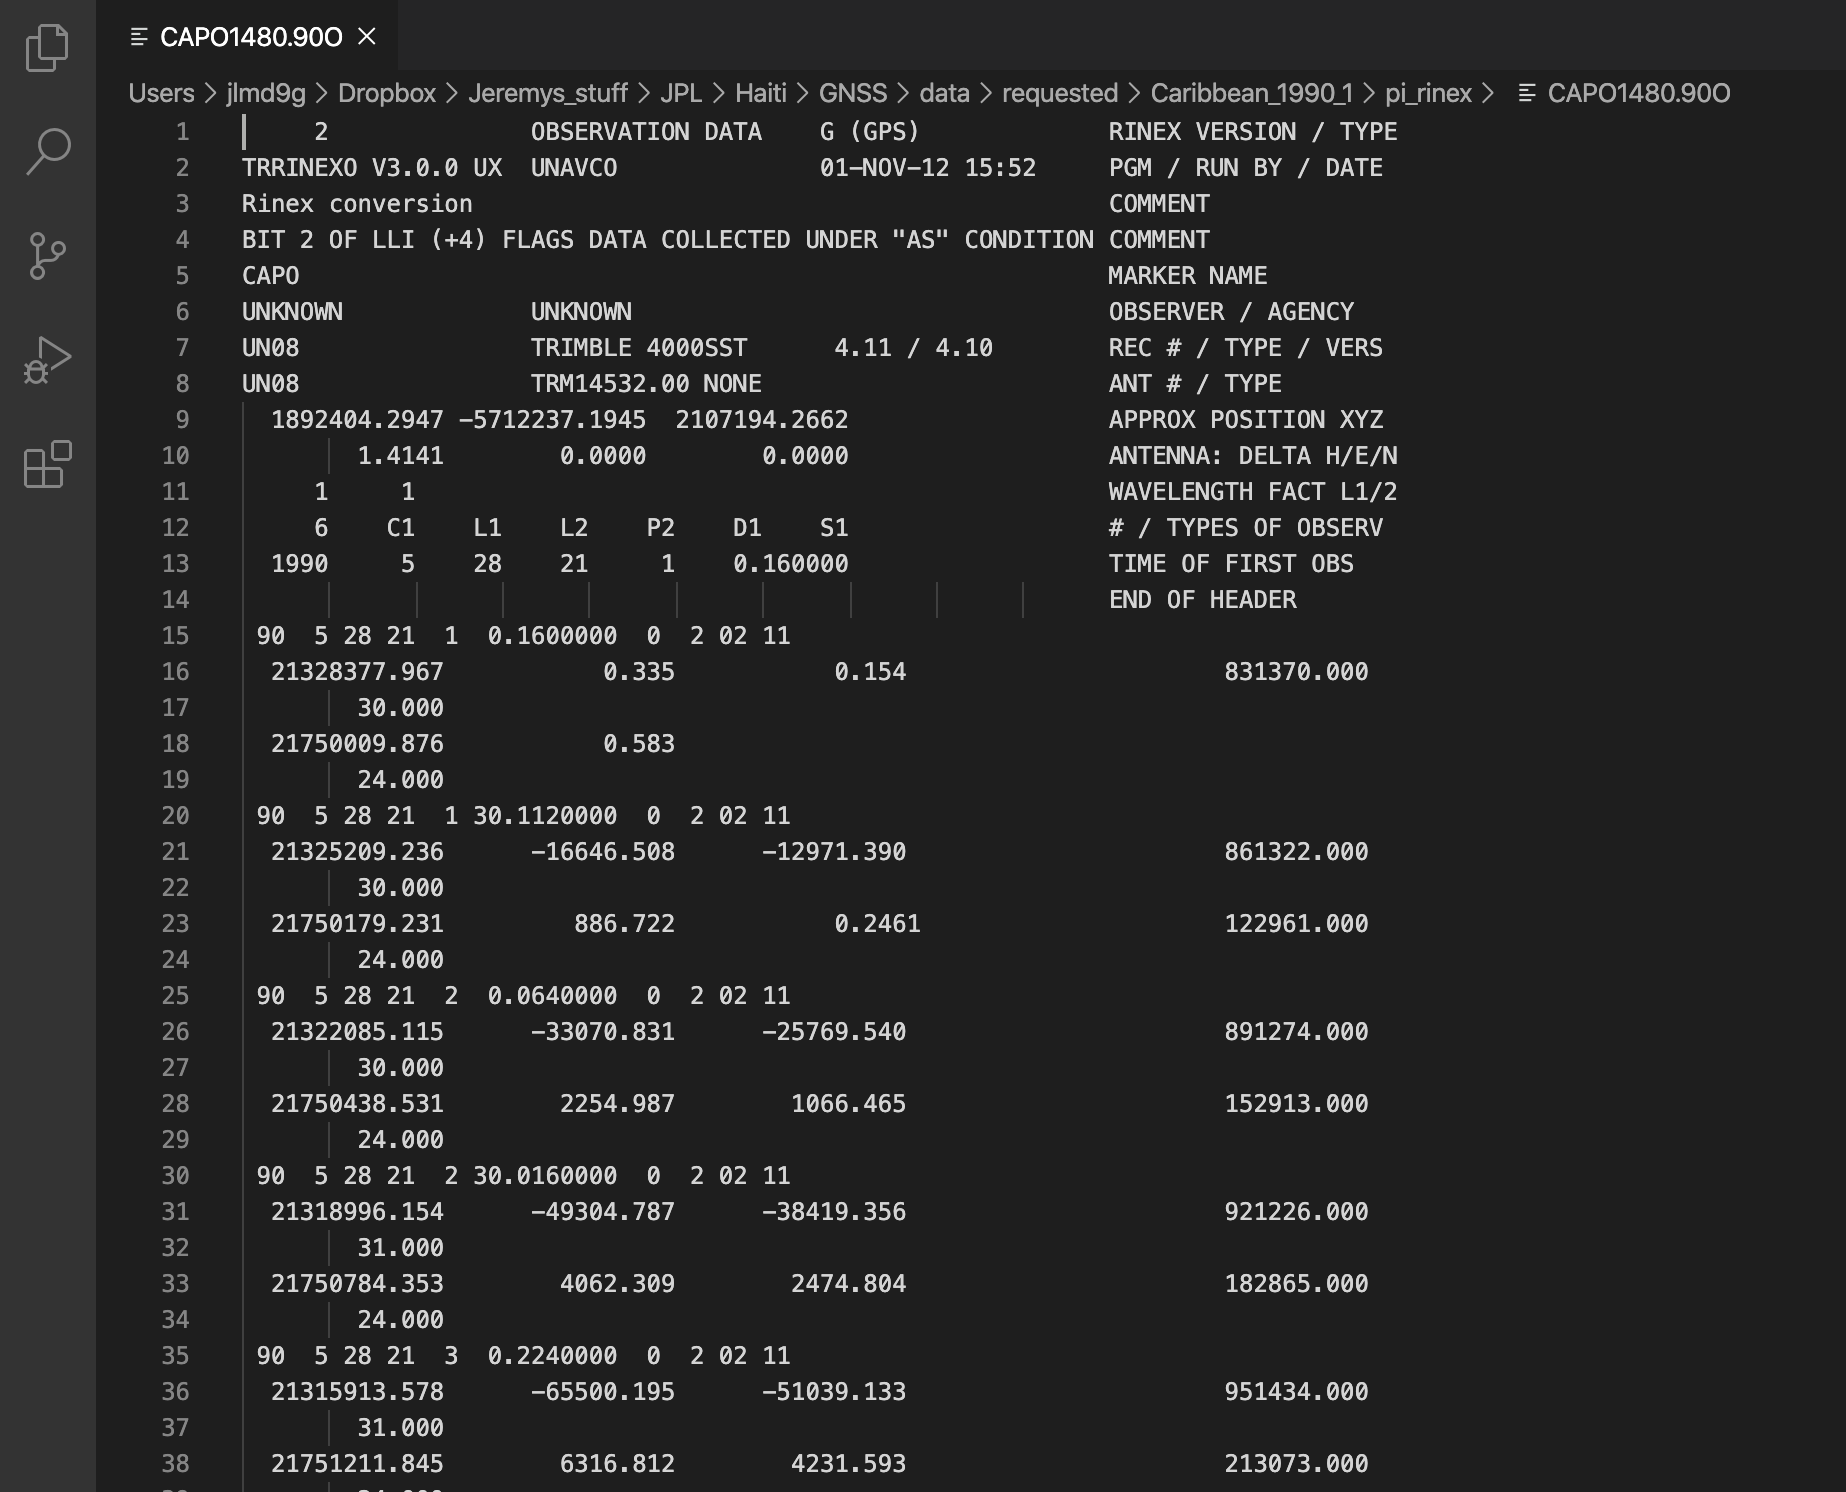

The image below shows a snapshot of the UNAVCO __[Data Archive Interface (DAI)](https://www.unavco.org/data/gps-gnss/data-access-methods/dai2/app/dai2.html#)__, where raw GNSS data can be obtained for any of the station holdings in UNAVCO's archive.
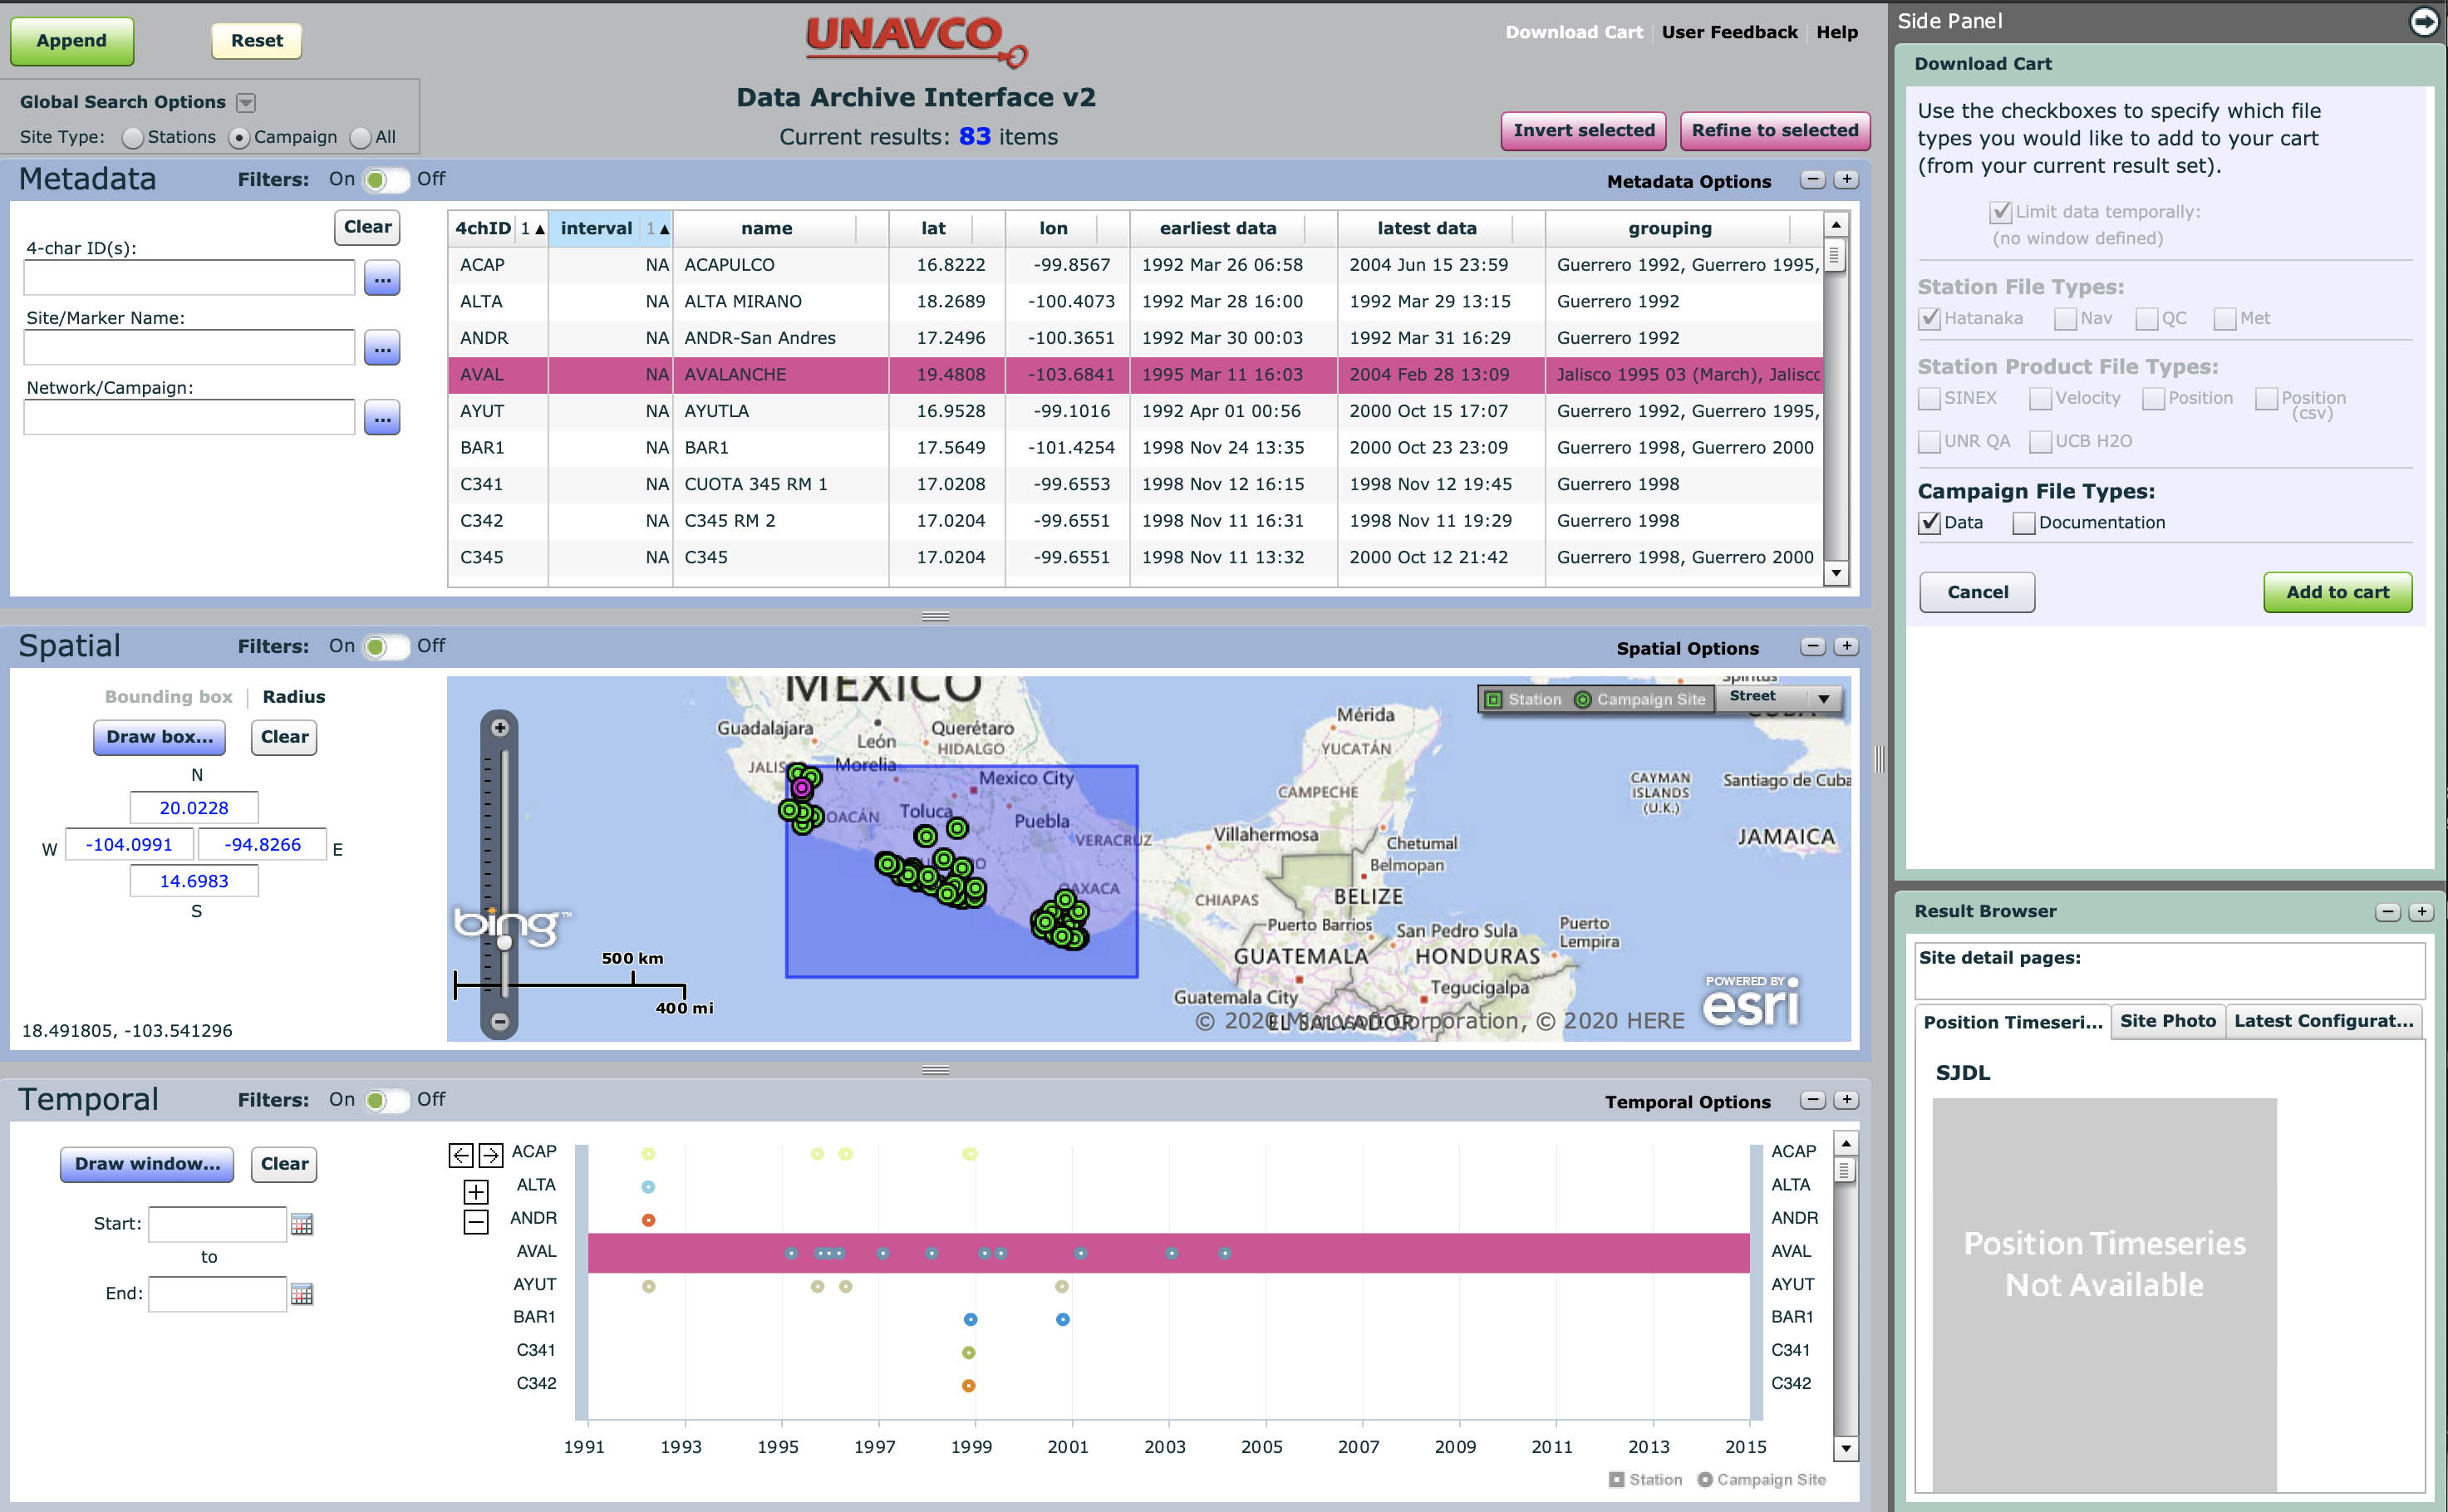

## GNSS time-series
Most earth science applications of GNSS use time-series. The plot below shows an example time-series for station (P595) in California, near where the 2019 Ridgecrest earthquake occurred. The time-series shows the point location relative to the initial starting point for each day. GNSS records data continously, but the data are typically averaged to one position per day to reduce noise. The time-series provides several types of useful information. First, the points change at a fairly constant rate; in the plot, you can see that the position of the GNSS station moves west (negative east) at a rate of approximately 7 mm/yr, and north at approximately 10 mm/yr. The data shows a fairly constant rate of change until an event, which in this case is the Ridgecrest earthquake. You also see that the vertical motion is much noisier and has
a much lower rate (the slope of the average trend is small).
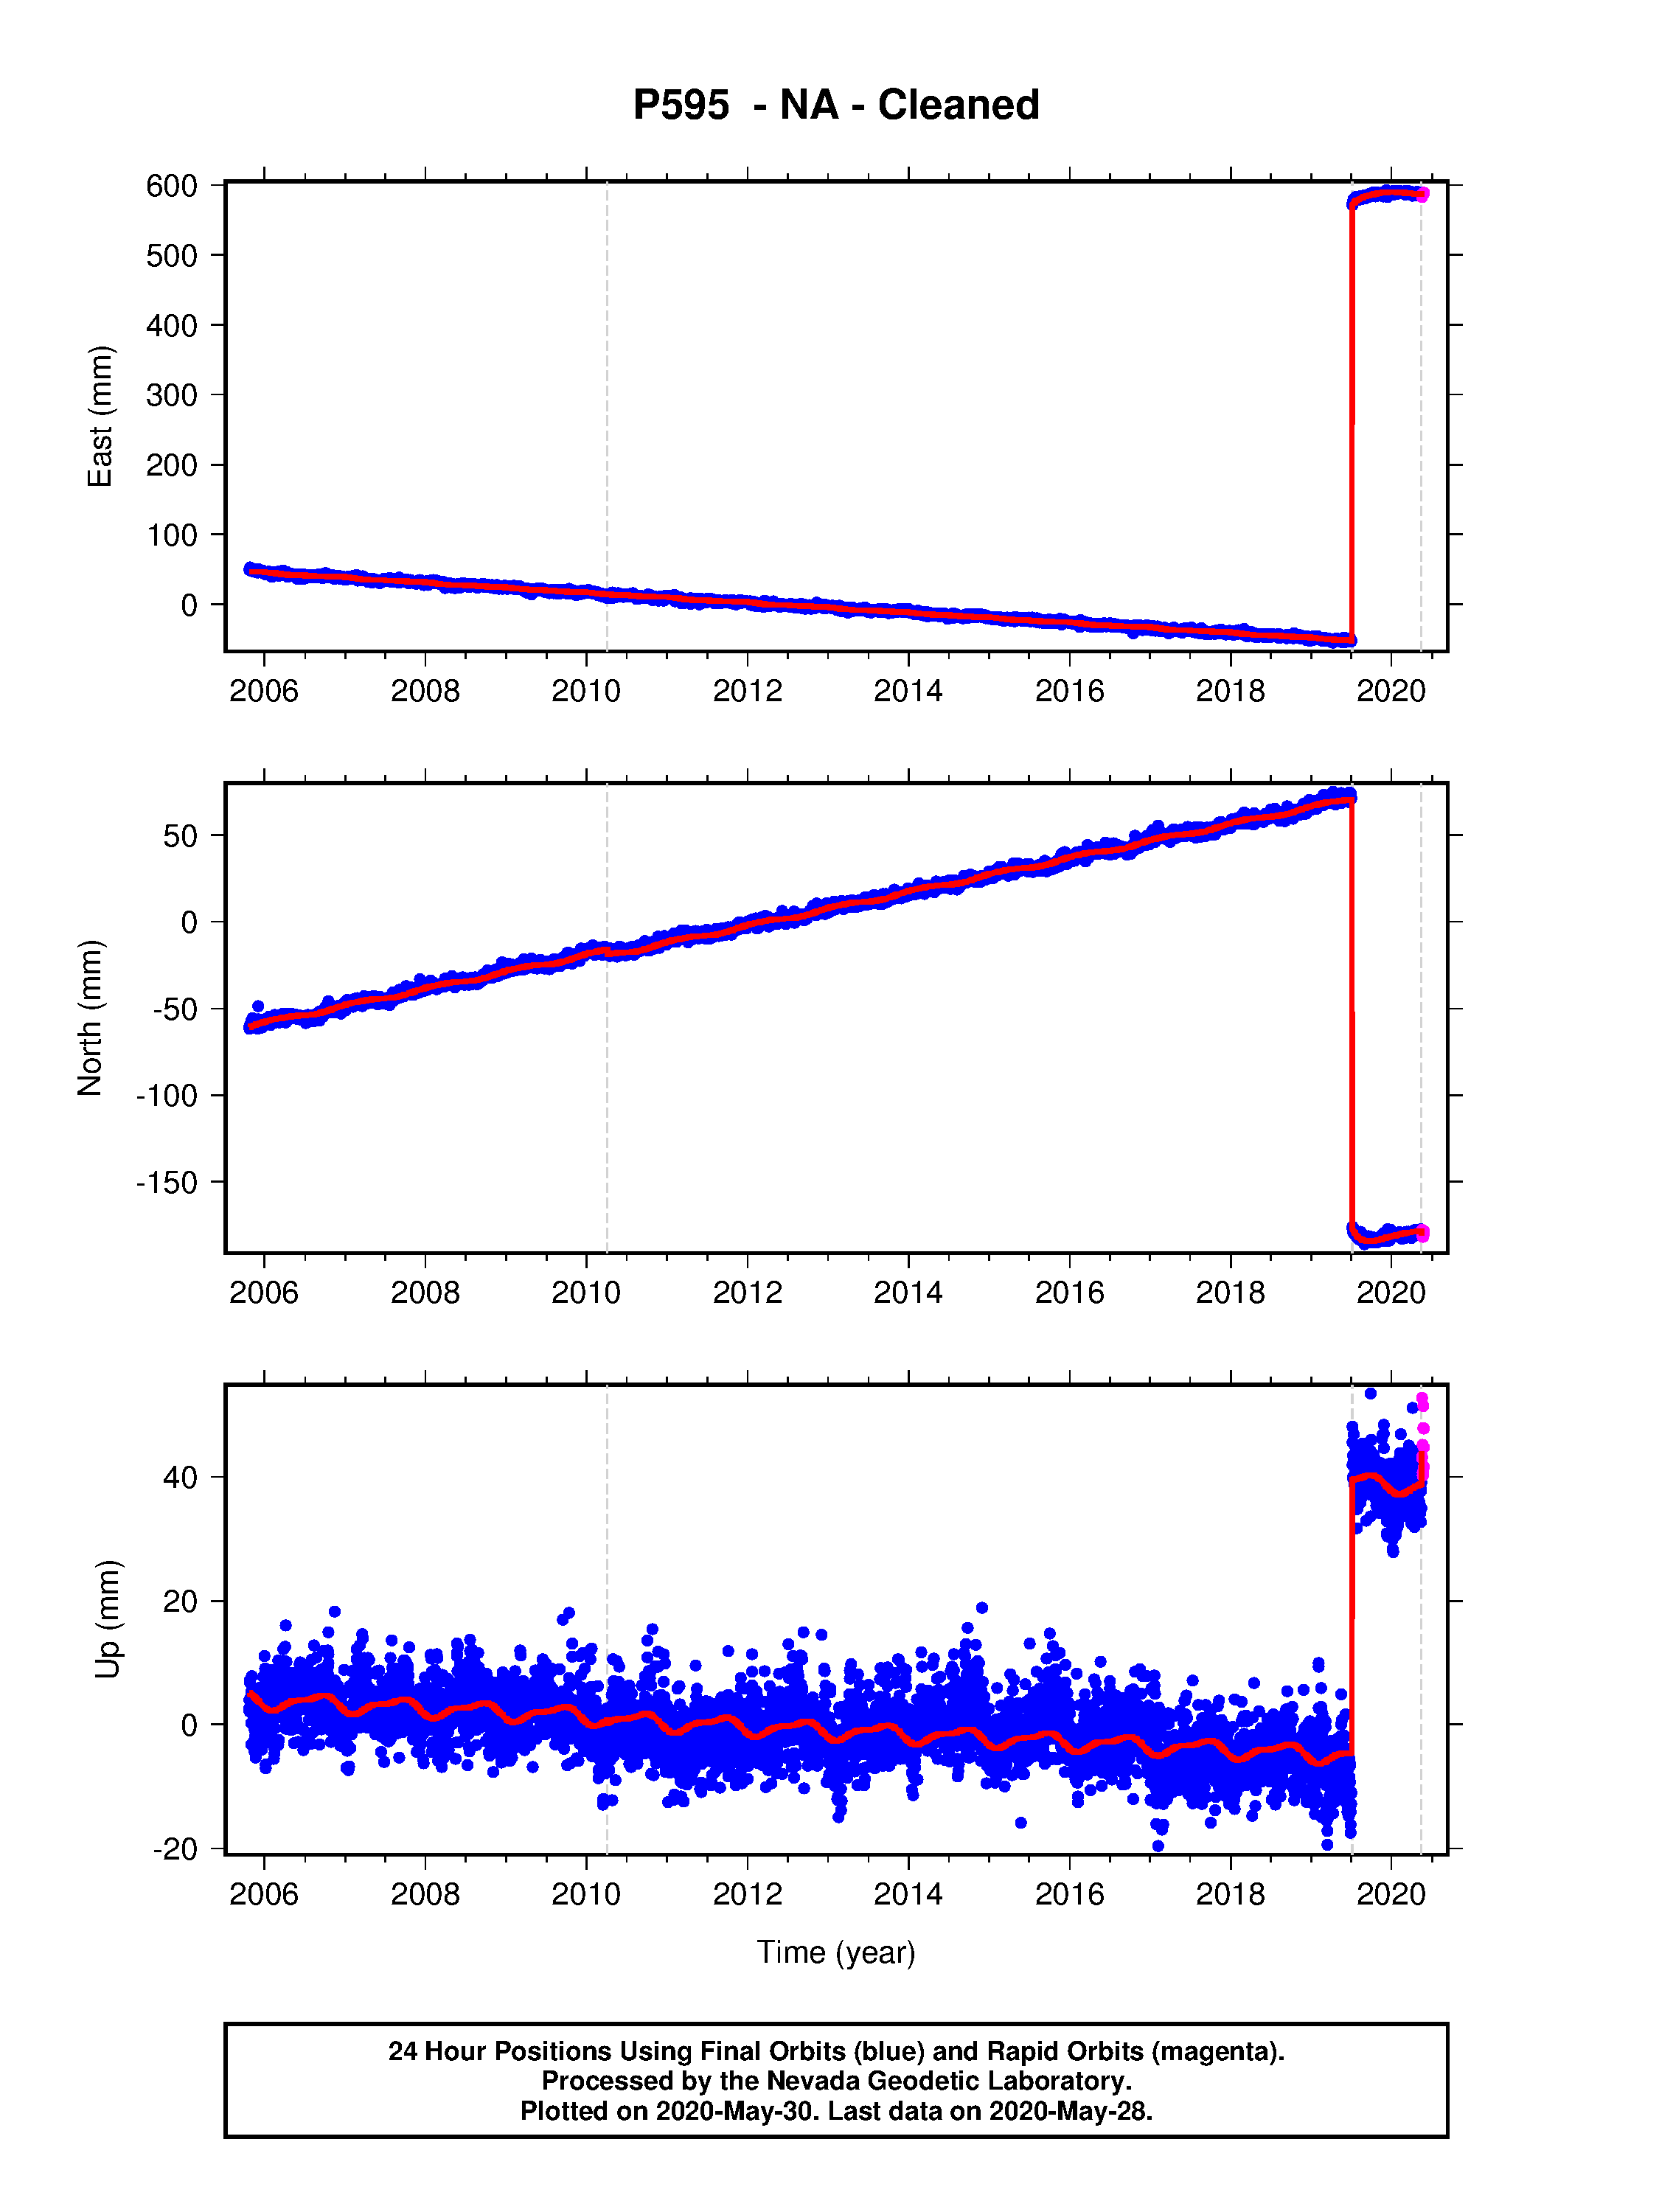

## Detrended Time-series
The next image shows a de-trended time-series, where the average rate has been subtracted from each day's point. The detrended time-series shows the total offset from the earthquake Ridgecrest earthquake, and it shows that the displacements after the earthquake are not zero right away, but there are some transients that take some time to dissipate.
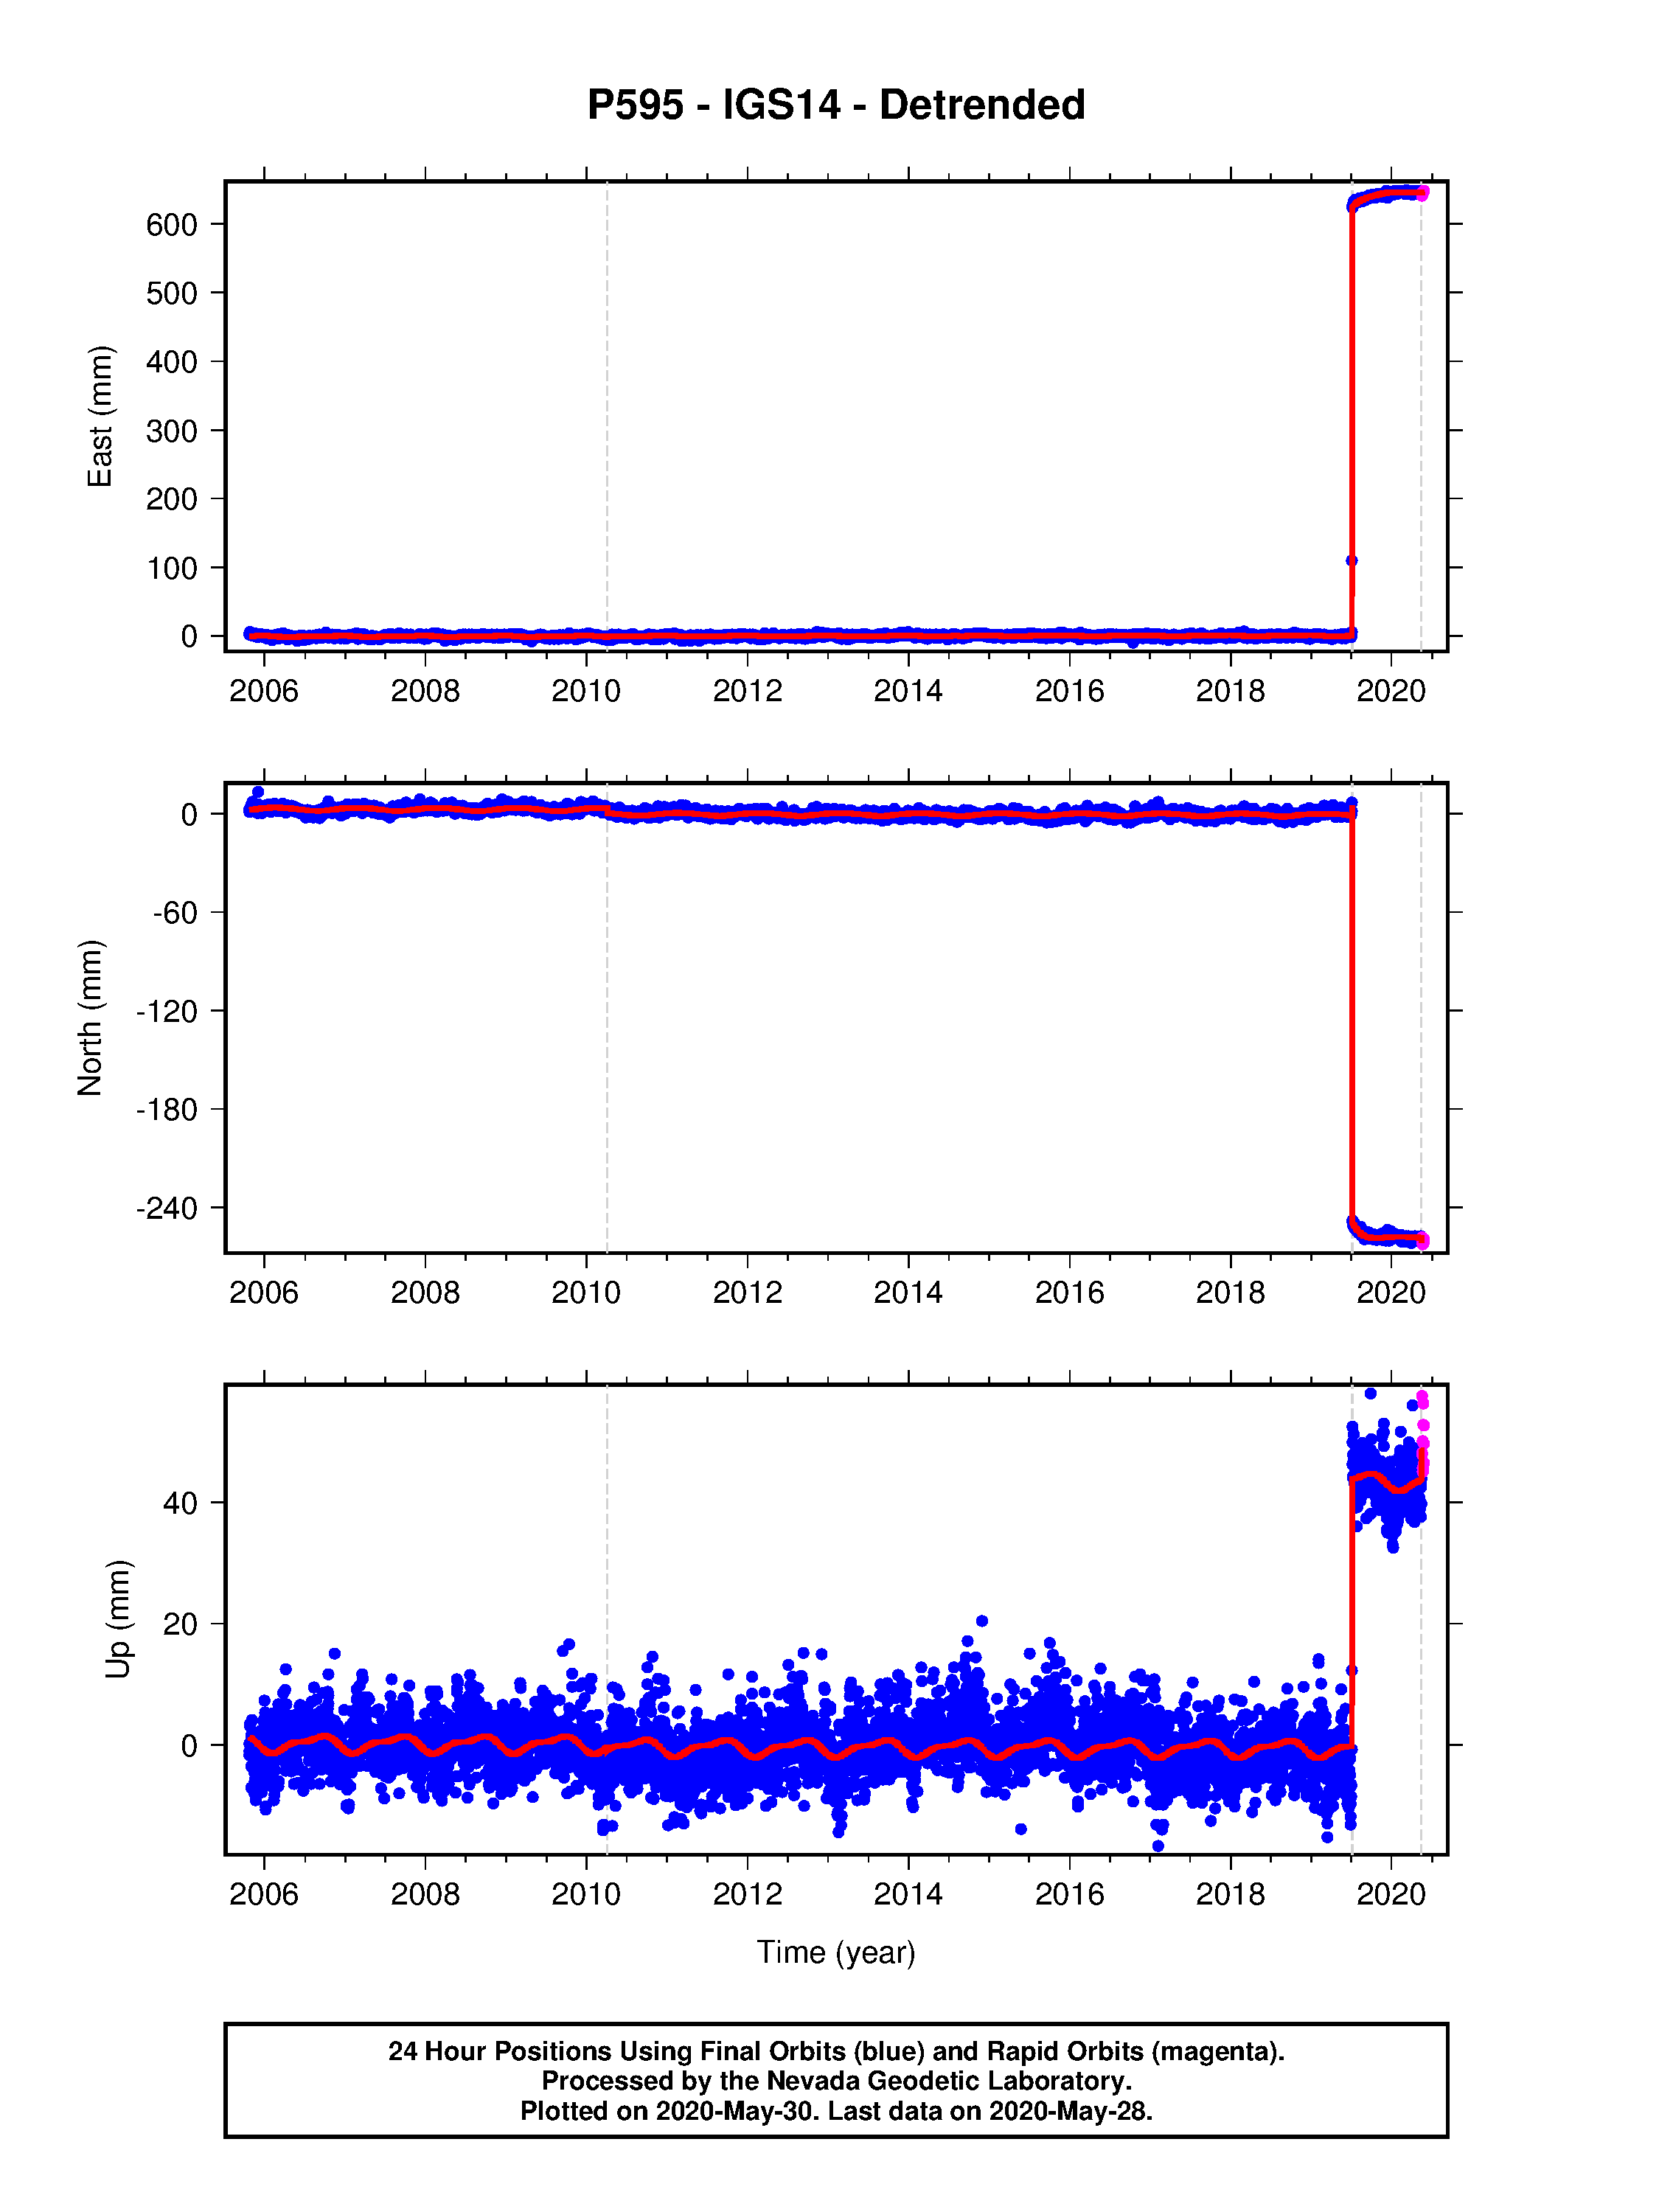

# Worked Example: Finding PBO GPS data in the Oregon Coast Ranges
## Finding station locations in latitude-longitude coordinates
 We will search for data generated by one of the PBO’s permanent GPS stations above the Cascadia subduction zone in northwest Oregon. If we do not know which station we want to learn about, we can go to the interactive PBO map and zoom-in on our area of interest (https://www.unavco.org/instrumentation/networks/status/pbo/gps). We find several green marker dots along the coastline. Clicking on any of the dots will provide some initial information. The dot we chose (Figure 1) is associated with station P395 (Rose_LodgeOR2006) located west of Salem in northwest Oregon. Clicking on the dot gives us a box that provides the name and location of the site, as well as a clickable link to more information at https://www.unavco.org/instrumentation/networks/status/pbo/overview/P395
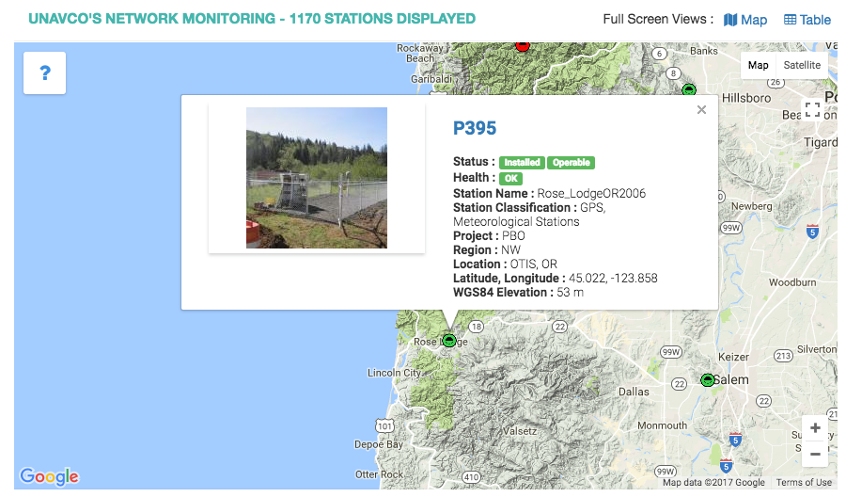

The overview page provides us with some information that we will need, and even some resources we might not need (such as a picture of the station) but is nice to have. 
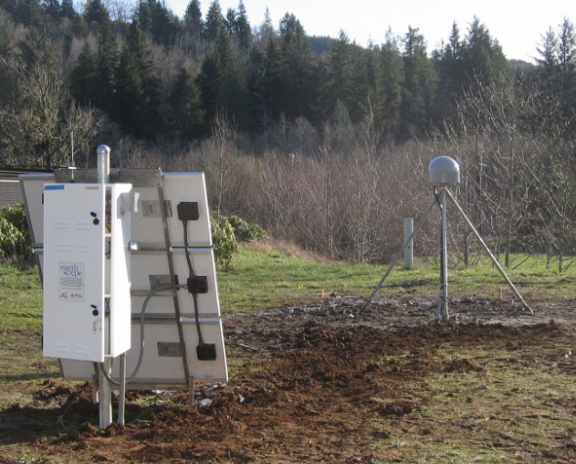

Near the bottom on the left side of the P395 overview page is a box titled “GPS Monument Coordinates.” The station location is listed on the line that begins “lat/log/elev (d/d/m).” The first number is the site latitude with positive values indicating north latitude (geographic coordinate system in the WGS84 datum). The second number is the longitude, with negative indicating west longitude. The third number is the elevation in meters relative to the WGS84 ellipsoid – that is, it is not the elevation relative to mean sea level, as might be indicated on a USGS topographic map.


### Finding station velocities
Now we need to acquire the velocity data for the site. Returning to the overview page for site P395, mid-way along the left side of the page there is a box labeled “Station Position” with three graphs. Clicking on the box causes the window to expand. The three plots show the change in position as a function of time – that is, they are time-series plots. The upper plot shows change in a north or south direction, the middle plot shows motion in an east or west direction, and the lowest plot shows motion in the up or down direction. These changes are measured relative to a reference frame that is computed relative to a set of GPS sites established in the stable interior of North America (called NAM14 for “North America 2014). __[Read more about references frames.](http://www.unavco.org/software/visualization/GPS-Velocity-Viewer/GPS-Velocity-Viewer-frames.html)__  

You can switch from the raw data view to a “cleaned” view to a “detrended” view using either the navigation arrows on your keyboard or by using the small control bar that should appear near the bottom of the plot window. Both the cleaned and detrended plots provide a numerical estimate of the mean velocity in each of the three directions along with the corresponding uncertainty (Figure 3). These velocities are frequently updated as new data are collected. We can also access the daily position data in a CSV spreadsheet file, and compute our own velocities and uncertainties.

On December 5, 2017, the posted velocities were:
- North 8.66 ± 0.08 mm/yr (positive value indicates motion toward north)
- East 6.92 ± 0.18 mm/yr (positive value indicates motion toward east)
- Up 0.46 ± 0.30 mm/yr (negative value indicates motion down)

We can use these data and the Pythagorean Theorem to find the total site velocity in mm/yr and the mean horizontal velocity in mm/yr: 
$$
v_{total} = \sqrt{v_E^2 + v_N^2 + v_U^2}
$$
and
$$
v_{horiz} = \sqrt{v_E^2 + v_N^2}
$$

Carefully record the velocities and their associated uncertainties for GPS stations P395, P396, and P404 below. The signs of the velocities are important because they indicate the direction of the velocity vector. 
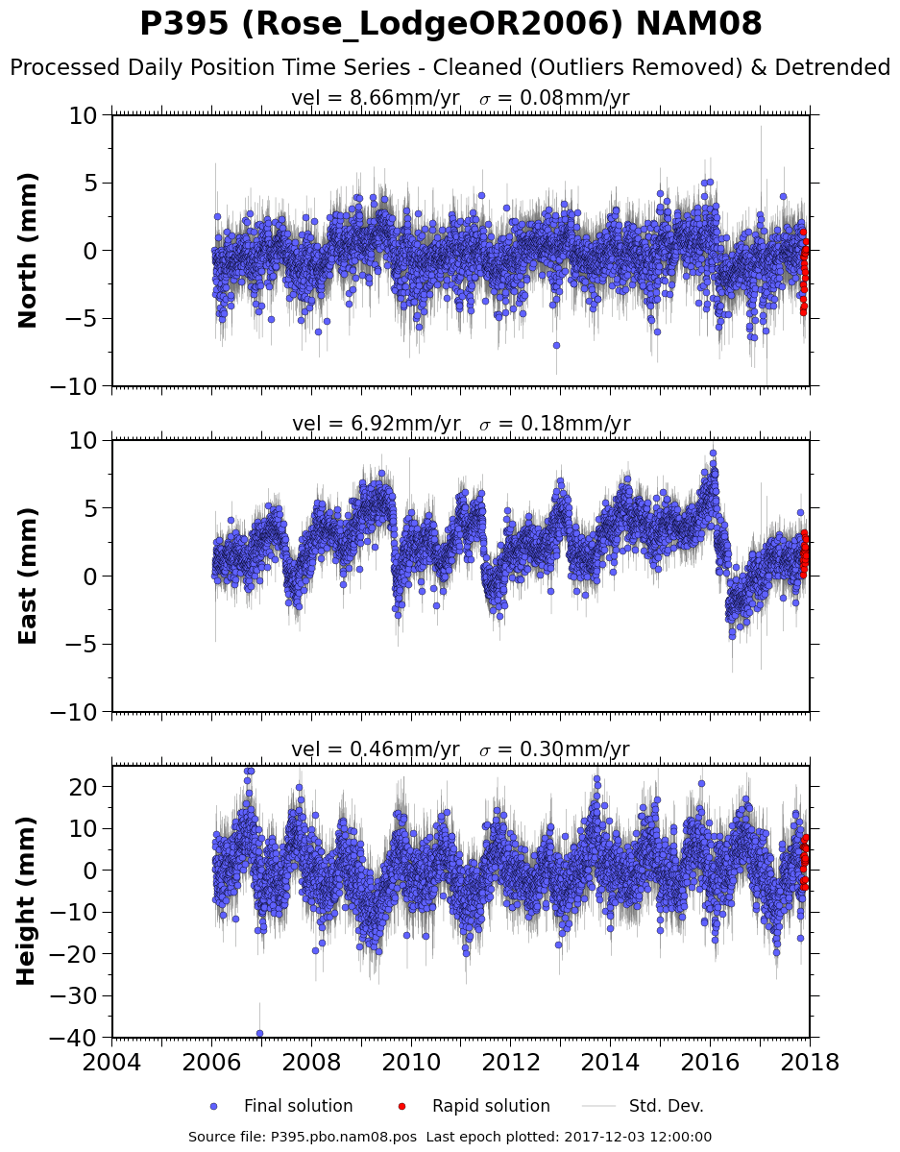

In [96]:
# Record the station locations as [lon, lat, hgt] vectors
xyz_p395 = np.array([])
xyz_p396 = np.array([])
xyz_p404 = np.array([])

In [90]:
# Record the velocities as a single three-component vector for each station
v_p395 = np.array([])
v_p396 = np.array([])
v_p404 = np.array([])

In [91]:
# Compute the total and horizontal velocity magnitudes for each station using the equations above 

# total velocities
vt_p395 = 0.
vt_p396 = 0.
vt_p404 = 0.

# horizontal velocities
vt_p395 = 0.
vt_p396 = 0.
vt_p404 = 0.

### Optional Advanced Problem for Extra Credit (Bonus 5 points)
If you are interested, you can compute the components of the strain rate tensor. To do this, you will need to determine the line-length directions and changes between each pair of stations, then use the equations below to compute the components of the strain rate tensor. $\Delta \mathcal{l}_i$ is the line length change along the direction $\alpha$ for the $i$th station pair (three stations in a triangle = three pairs of stations = three lines). You will need to setup the matrix-vector linear system and solve it for the strain rate components. You can use the linear solver example from Part C to help you do this in Python if you want. 
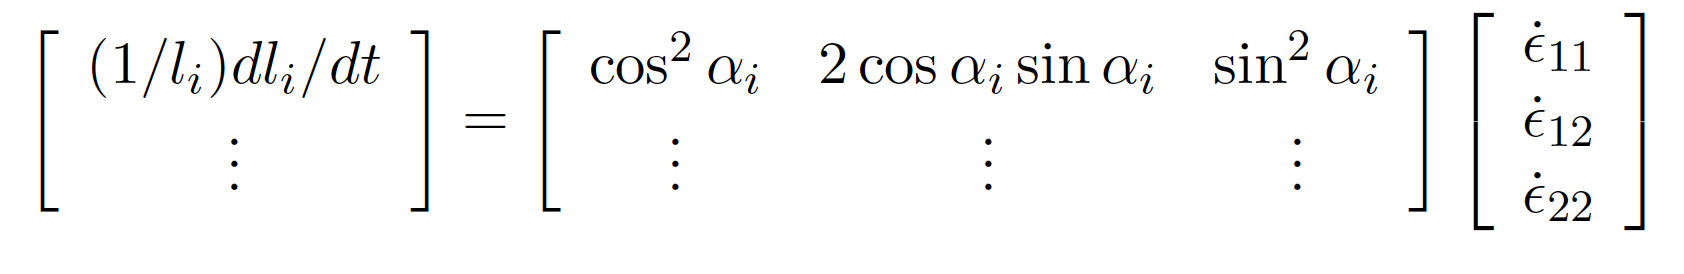

In [ ]:
# Your code here

## Part C: GNSS for Tectonic Deformation and Hazard

In this lab we will consider what Global Navigational Satellite Systems (GNSS) data tell us about earthquake hazard on the central San Andreas Fault. In particular, we will consider the difference in the geodetic signatures of locked and creeping faults. 

## An important lesson from a major catastrophe
In 1906 the great San Fransisco earthquake occurred and resulted in the destruction of much of San Fransisco (although the largest amount of damage was actually due to the fires that burned as a result of broken gas lines and no water to put them out because of broken water lines). I encourage you to take a look at the __[Wikipedia](https://en.wikipedia.org/wiki/1906_San_Francisco_earthquake)__ description of the event, which describes in detail the aftermath of the event itself and the national and international repercussions in the economy and finance industry of the time. Should such an earthquake happen again today, there would likely be some improvement in damaged buildings, but many of the cities' older buildings and sectors, including gas lines, are still vulnerable. 

The size of the earthquake is uncertain due to the lack of good observations from that time; however, scientists at the United States Geological Survey (USGS) have __[estimated that the earthquake was an MW 7.7 or 7.9](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/magnitude.php)__. "MW" stands for "moment magnitude," and is different from the "Richter magnitude." The Richter magnitude scale is no longer used much by scientists because it describes the intensity of shaking, rather than the actual size of the earthquake, and so it can vary a bit depending on site conditions (e.g., soft soils shake harder than bedrock). 

However, the __[lessons learned from the 1906 earthquake](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/revolution.php)__ are still applied today. The __[**theory of elastic rebound**](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/reid.php)__, which we will use in this lab, is a fundamental idea about how earthquakes work. Why is the theory important? Because it allows us to make predictions of how much slip will happen in the next earthquake. By measuring how much of a fault is "locked," we can turn that around to say how large the next earthquake is likely to be. We will do this in this lab.

## The San Andreas Fault
The San Andreas Fault (abbreviated SAF) is the largest strike-slip fault system in the United States, and produced both the MW 7.7 San Fransisco earthquake as well as the MW 7.9 Fort Tejon earthquake that occurred in southern California. We will be looking at data around the SAF at the northern end of the Fort Tejon earthquake rupture, near Parkfield, CA. North of this area the SAF is creeping at the surface. 

## GNSS time-series
Processing raw GNSS data for tectonic studies is a highly technical skill that we will not be able to address in this course. Instead, we will access publicly-available data that has already been processed up to the time-series level. This time-series data contains one position point in three dimensions for a given station on a daily frequency. The data is available from several different sources, including the __[University of Nevada at Reno](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html)__ and __[UNAVCO](https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html)__; the latter has data from several different sources. Using data already pre-processed will save a lot of time for this lab, but be aware that each processing agency has its own set of stations and quirks that must be investigated for real research-level work.

In [32]:
# First import the libraries and set up some helpful functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# some helpful functions
def cosd(angle_in_degrees):
    return np.cos(np.radians(angle_in_degrees))
def sind(angle_in_degrees):
    return np.sin(np.radians(angle_in_degrees))

In [33]:
# We will need these libraries to run this notebook
#!pip install pyproj #<-- Uncomment and run this once at the beginning of running this section of the notebook

In [34]:
# Load some GNSS velocities 
URL = 'https://raw.githubusercontent.com/jlmaurer/GE6146/master/data/GNSS_Vels.csv'
gnss_vels_Parkfield = pd.read_csv(URL).set_index('SITE_NAME')
gnss_vels_Parkfield['Lon'] = gnss_vels_Parkfield['Lon'] - 360  # convert to degrees west

The data fields Veast, Vnorth, Vup, sigEast, sigNorth, and sigUp are all given in meters. To make the numbers easier to work with, convert them to meters. 

In [35]:
# Your code here

In [36]:
# Look at the data
gnss_vels_Parkfield.head()

Lat         Lon    Veast   Vnorth      Vup  sigEast  \
SITE_NAME                                                              
ALTH       36.889607 -120.669763 -0.00931  0.01036 -0.04385  0.00113   
ALTH       36.889607 -120.669763 -0.00931  0.01036 -0.04385  0.00113   
BKR1       35.132389 -119.109480 -0.01356  0.01318 -0.03680  0.00083   
BKR1       35.132388 -119.109480 -0.01356  0.01318 -0.03680  0.00083   
BVPP       35.157277 -119.347509 -0.01736  0.01510 -0.00046  0.00035   

           sigNorth    sigUp  
SITE_NAME                     
ALTH        0.00039  0.00765  
ALTH        0.00039  0.00765  
BKR1        0.00113  0.00844  
BKR1        0.00113  0.00844  
BVPP        0.00019  0.00134

### Notes
1. These velocities are from UNAVCO (see website link above) and are in the North American 2014 reference frame
2. "Veast", "Vnorth", "sigEast", etc are velocities and uncertainties in the East, North, and Up directions.
3. Having three velocity components (East, North, Up) means that these GNSS velocities are actually 3-component
    vectors, which can be represented by: \begin{bmatrix}Veast \\ Vnorth\\ Vup\end{bmatrix}. 
4. The uncertainties shown are only for the individual components. More generally, the uncertainty of every individual velocity measurement has a 3x3 matrix of associated uncertainties: \begin{bmatrix} \sigma^2_{E} & \sigma^2_{EN} & \sigma^2_{EU} \\ \sigma_{NE} & \sigma^2_{NN} & \sigma_{NU} \\ \sigma^2_{UE} & \sigma^2_{UN} & \sigma^2_{UU} \end{bmatrix}
For the values we have been provided, we can only fill in the diagonal elements of the matrix, and we will assume the others are zero: \begin{bmatrix} \sigma^2_{E} & 0 & 0 \\ 0 & \sigma^2_{N} & 0 \\ 0 & 0 & \sigma^2_{U} \end{bmatrix} where "sigEast" from the table is equal to $\sqrt{\sigma^2_{E}}$, etc.

**Plot the data** using the __[quiver](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.quiver.html)__ package in matplotlib.pyplot. Make sure to use "Lon" for the x-axis and "Lat" for the y-axis. Use Veast for the U-component of velocity and Vnorth for the V-component. Make sure to add appropriate titles, axis labels, legends, etc. as needed. 

In [37]:
# Your code here

The image shows some of these same stations plotted in the UNAVCO GNSS viewer to give you a better idea of where they are. The view is extended to Los Angeles for reference. 
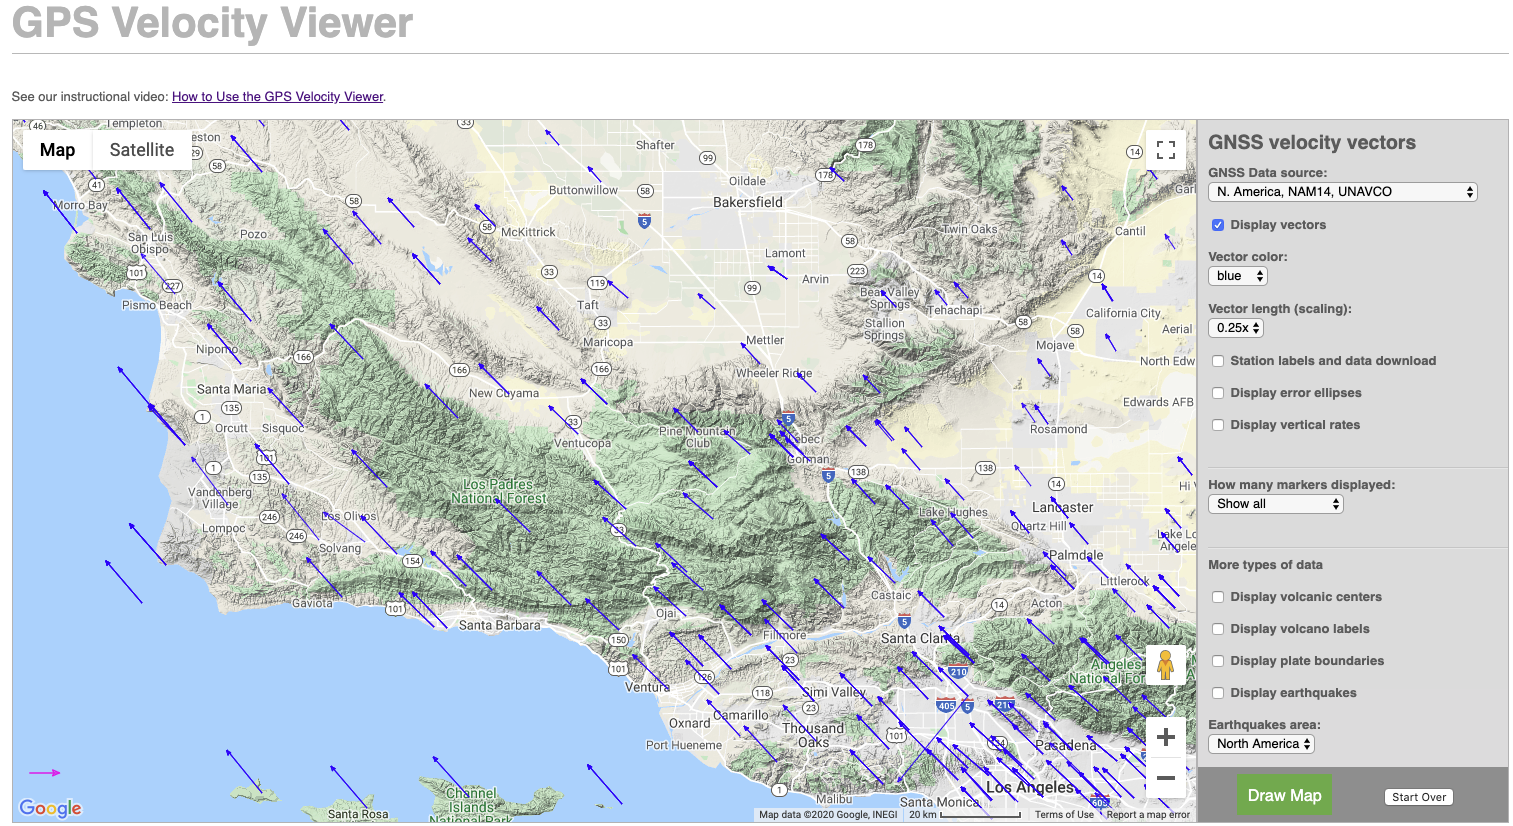

In order to better view and model these data, we will first rotate them into a coordinate system that is parallel to the San Andreas Fault. This way we can model the data as a 1-D velocity profile.

In [38]:
# Define a function to create a rotation matrix
def createRotationMatrix(angle_deg):
    RotationMatrix = np.array([[cosd(angle_deg), sind(angle_deg), 0], [sind(-angle_deg), cosd(angle_deg), 0], [0, 0, 1]])
    return RotationMatrix

'''
The rotation matrix is a 3x3 matrix that will rotate the velocities into a fault-parallel/fault perpendicular
coordinate system and leave the vertical heights unchanged.
'''
rotation_angle = 40
R = createRotationMatrix(rotation_angle) # we will call the matrix R in lower cells
print('R = ')
print(R)

R = 
[[ 0.76604444  0.64278761  0.        ]
 [-0.64278761  0.76604444  0.        ]
 [ 0.          0.          1.        ]]


In [39]:
# We will iterate over each station and rotate each set of velocities individually.
# We don't need the verticals for this part
Vparr, Vperp= [],[]
for ve, vn, vu in zip(gnss_vels_Parkfield['Veast'], gnss_vels_Parkfield['Vnorth'], gnss_vels_Parkfield['Vup']):
    vOriginal = np.array([ve, vn, vu])
    vRotated = np.dot(R, vOriginal)
    Vparr.append(vRotated[1])
    Vperp.append(vRotated[0])

Vparr = np.array(Vparr) # This converts the list we created using the for-loop to numpy arrays (matrices)
Vperp = np.array(Vperp) 

In [40]:
'''
In order to model the velocities, we need to convert the data into a local coordinate system.
We will convert the lat/lon points to UTM (x,y) and then subtract out a reference point located 
very close to the fault. You will need to find the UTM zone for the data online (use the plot showing 
lat/lon above) 
'''
from pyproj import Transformer

# setup your projections
crs_wgs = 'epsg:4326' # WGS84 geographic
crs_local = 'epsg:26911' # use a locally appropriate projected CRS
transformer = Transformer.from_crs(crs_wgs, crs_local, always_xy = True)

In [41]:
# Cast your geographic coordinate pair to the new projected system
input_lon = gnss_vels_Parkfield['Lon'].values # ".value" is necessary to convert from a pandas Series to a numpy array
input_lat = gnss_vels_Parkfield['Lat'].values
X, Y = transformer.transform(input_lon, input_lat)

In [42]:
'''
Now write a code that takes an origin point (use 36.0, -120.5 as your origin) and converts 
it to the same local projection as above. 
'''
origin = np.array([36.0, 239.5])

# Call your new variables X and Y
xOrigin, yOrigin = transformer.transform(origin[1], origin[0])

# You need to change the code below to subtract the origin x,y from the x,y points of all the data
X = X #This is not correct
Y = Y #This is not correct

In [44]:
# Now use the for-loop above as a template to rotate the local x,y coordinates
Xparr, Xperp= [],[]
for x, y in zip(X, Y):
    xyOriginal = np.array([x,y,0]) # we will assume heights are all zero; for our purposes it doesn't matter
    # Your code here

Xparr = np.array(Xparr)
Xperp = np.array(Xperp)

# Convert the new coordinates to km instead of meters 
# Your code here

In [45]:
# Now plot the new velocities at the new locations using quiver
# Your code here

### Modeling
In order to understand what the velocities tell us about fault locking, we need to use a model. For this simple excercise, we will use a single fault with only two parameters: slip rate and locking depth. In this case, assuming an elastic half-space, the velocities across the fault can be modeled with the following equation: 
$$
\mathbf{v}_3(x_2 = 0) = \frac{\dot{s}}{\pi} \tan^{-1}{\left(\frac{x_1 - x_F}{d}\right)}
$$
where $\dot{s} = ds/dt$ is the fault slip rate, the surface velocities $v_3$ are in the out-of-plane direction $x_3$, $x_1$ is the fault-perpendicular position, $x_F$ is the $x_1$ location of the fault, and $d$ is the maximum depth of the fault (or "locking depth"). There are two or three unknowns in this equation: $\dot{s}$ and $d$, and $x_F$ if you do not know it. For us, "Vparr" is $v_3$ and "Xperp" is $x_1$. ($x_2 = 0$ means that our measurements are taken at the surface of the ground.) With this information you should be able to model the velocities you plotted in the last cell. 

<div class="alert alert-block alert-info">
<b>Note:</b> One more issue you will have to resolve is that there could be an unkonwn offset, termed a "rigid-body" offset, that relates to the frame of reference of the velocities. This means that you could add or subtract a constant term (scalar) from all of the measurements and not change the strain or estimated slip rate or depth. This effect is termed "rigid body" because it is a translation - a movement of all points in the same direction for the same distance - with no strain. Mathematically, this acts like a constant add to the equation above, which is also unknown.
$$
\mathbf{v}_3 = \frac{\dot{s}}{\pi} \tan^{-1}{\left(\frac{x_1 - x_F}{d}\right)} + c
$$
</div>

Solving for the $c$ and $x_F$ terms are relatively easy, because they just adjust your model up or down ($c$) or left-to-right ($x_F$). You can estimate what they should be by simply looking at the plot. For $\dot{s}$ and $d$, we will use a non-linear Greens function approach. 

Notice that if $x_F$ and $d$ are known, we can write the equation as a linear system: 
$$
\mathbf{v}_{parr} = \begin{bmatrix} \frac{1}{\pi} \tan^{-1}{\left(\frac{x_1 - x_F}{d}\right)} & 1 \end{bmatrix} \begin{bmatrix} \dot{s} \\ c \end{bmatrix}
$$
This is a dot product of two length-two vectors. If this were the only step, our job would be easy, as there are many linear solvers for handling dot product-type problems. However, because $x_F$ and $d$ are inside the left matrix (our Greens' function matrix); note that there is one row for each data point, so even though I've written it as a vector it is actually a M x 2 matrix, where M = length(Vparr). In order to solve this problem, we will take a sampling approach, where we take a set of values for $d$ and compute the overall data misfit. We will then take as our solution the value with the lowest misfit. 

In [46]:
# Generate a set of x_1-values 
xMax = 130 # Take the maximum and minimum x-values from the data (note units are in km)
xMin = -80
Nx = 1000
xs = np.linspace(xMin, xMax, Nx)

In [57]:
# Generate some d-values
ds = np.arange(5, 26, 1)  # Create a set of depths from 5 to 20 km, typical for California

In [58]:
# Set the position parameter as best you can
xF = 0. # Your value here

In [72]:
# create the G-matrices for each d
Gs = []
for d in ds:
    term1 = None # Your code for the arctanget term here
    term2 = np.ones(term1.shape)
    Gs.append(np.stack([term1, term2], axis=1))

The number of rows of a G matrix should equal the number of observations, in this case Vparr, and the number of columns should equal the number of unknown parameters, in this case two: $\dot{s}$ and $c$. 

In [73]:
print(Gs[0].shape)
print(len(Vparr))

(268, 2)
268


Now iterate over the list of G-matrices to create the residual misfit norm for each value of d. We will use a numpy algorithm called lstsq (least-squares) to solve the linear system given $d$. 

In [81]:
# iterate over each G and solve for sdot
sdots, cs = [], [] # create two lists to store the solutions
res_norms = [] # create a list to store the residual misfit norms
for G in Gs:
    mhat, res, rank, s = np.linalg.lstsq(G, Vparr, rcond=None)
    sdots.append(mhat[0])
    cs.append(mhat[1])
    
    # compute predicted data and residual misfits
    predictedData = np.dot(G,mhat)
    residuals = Vparr - predictedData
    res_norm = np.sum(np.square(residuals))/len(Vparr)
    res_norms.append(res_norm)

In [93]:
# Now plot the total misfit versus d
# Your code here

In [94]:
# Plot the estimated slip rate versus d
# Your code here

In [95]:
# Create the predicted data for the best-fitting (or your preferred choice of) parameter combination
# You may need to experiment with various parameter values here to find the "best" one from your perspective
dBest = 0. # pick the best d
xF = 0. # adjust xF if needed

term1 = (1/np.pi)*np.arctan2(Xperp - xF, dBest)
term2 = np.ones(term1.shape)
Gbest = np.stack([term1, term2], axis=1)

mbest, res, rank, s = np.linalg.lstsq(Gbest, Vparr, rcond=None)
dpred_best = np.dot(Gbest, mbest)
residuals_best = dpred_best - Vparr
rnorm_best = np.sum(np.square(residuals_best))/len(Vparr)

# Plot the observed and predicted data in space
# Your code here

In [88]:
# Based on above, print out your preferred slip rate and locking depth
dbest = 0. # your preferred locking depth
sdot_best = 0. # your preferred slip rate
print('The preferred locking depth is {}, and slip rate is {} mm/yr'.format(dbest, sdot_best))

The preferred locking depth is 0.0, and slip rate is 0.0 mm/yr
